In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.stats import linregress

In [8]:
fp1 = "WHR2015-21.xlsx"
fp2 = "Water and Sanitation Services.csv"
fp3 = "Number without safe drinking water.csv"

#read happiness data
whi_df = pd.read_excel(fp1, header = [0])
whi_df.head()

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Switzerland,7.587,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402
1,Iceland,7.561,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834
2,Denmark,7.527,3,2015,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448
3,Norway,7.522,4,2015,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029
4,Canada,7.427,5,2015,10.642016,0.941860,71.443192,0.916792,0.285598,0.444144


In [18]:
whi_df['Year'].value_counts()

2015    158
2016    157
2018    156
2019    156
2017    155
2020    153
2021    149
Name: Year, dtype: int64

In [23]:
#read water and sanitation services 
wss_df = pd.read_csv(fp2, header = [1])
wss_df.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,"Safely managed drinking water sources, urban (...",86.1804,NaN,World Health Organization (WHO) and United Nat...
1,1,"Total, all countries or areas",2005,"Safely managed drinking water sources, rural (...",43.0323,NaN,World Health Organization (WHO) and United Nat...
2,1,"Total, all countries or areas",2005,"Safely managed drinking water sources, total (...",64.2425,NaN,World Health Organization (WHO) and United Nat...
3,1,"Total, all countries or areas",2005,"Safely managed sanitation facilities, urban (P...",37.0176,NaN,World Health Organization (WHO) and United Nat...
4,1,"Total, all countries or areas",2005,"Safely managed sanitation facilities, rural (P...",26.0720,NaN,World Health Organization (WHO) and United Nat...


In [25]:
#drop years not in world happiness data 
wss_df['Year'].value_counts()
wss_df= wss_df.loc[wss_df['Year']>2015]
#Note: this data set only has data from 2017, 2010, and 2005 

In [46]:
#read num without safe drinking water 
wosw_df = pd.read_csv(fp3, header = [1])
wosw_df.head()

,Row Labels,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,(blank),Grand Total
0,Afghanistan,1.850922e+07,1.924345e+07,1.995075e+07,2.071789e+07,2.143656e+07,2.203515e+07,2.249214e+07,2.273901e+07,2.292012e+07,...,2.527644e+07,2.585455e+07,2.636901e+07,2.681000e+07,2.719163e+07,2.752933e+07,2.784696e+07,2.818842e+07,NaN,5.007040e+08
1,Albania,1.591587e+06,1.593606e+06,1.594830e+06,1.593761e+06,1.530163e+06,1.463817e+06,1.394683e+06,1.323311e+06,1.251264e+06,...,9.158596e+05,8.525783e+05,8.500461e+05,8.481330e+05,8.468802e+05,8.459862e+05,8.450913e+05,8.439282e+05,NaN,2.450158e+07
2,Algeria,9.288298e+06,9.233478e+06,9.176867e+06,9.122057e+06,9.072872e+06,9.032255e+06,9.000871e+06,8.978836e+06,8.966463e+06,...,9.058227e+06,9.352666e+06,9.719710e+06,1.011006e+07,1.052321e+07,1.103013e+07,1.156416e+07,1.211102e+07,NaN,2.012948e+08
3,American Samoa,1.281718e+04,1.226391e+04,1.167365e+04,1.103808e+04,1.035162e+04,9.608535e+03,8.819566e+03,8.000112e+03,7.180782e+03,...,3.556527e+03,2.876786e+03,2.191910e+03,1.503452e+03,9.110216e+02,9.084662e+02,9.060256e+02,9.041419e+02,NaN,1.266980e+05
4,Andorra,6.120504e+03,6.303399e+03,6.556491e+03,6.849651e+03,7.136997e+03,7.382328e+03,7.581131e+03,7.739038e+03,7.849293e+03,...,7.560075e+03,7.414336e+03,7.300146e+03,7.234815e+03,7.206920e+03,7.207948e+03,7.220863e+03,7.232001e+03,NaN,1.532604e+05


In [47]:
wosw_df =wosw_df[['Row Labels','2015','2016','2017', '2018', '2019','2020']]
#unpivot the table 
wosw_df = pd.melt(wosw_df, id_vars = 'Row Labels', value_vars = ['2015','2016','2017', '2018', '2019','2020'], var_name = 'Year')
wosw_df= wosw_df.rename(columns = {'Row Labels':'Country'})
wosw_df.head()


,Country,Year,value
0,Afghanistan,2015,2.636901e+07
1,Albania,2015,8.500461e+05
2,Algeria,2015,9.719710e+06
3,American Samoa,2015,2.191910e+03
4,Andorra,2015,7.300146e+03


In [50]:
wosw_df['Year'] = wosw_df['Year'].astype(int)

In [54]:
merged_df = pd.merge(whi_df, wosw_df, on=["Country", "Year"], how="left")

In [56]:
merged_df= merged_df.rename(columns = {'value':'num ppl wo clean h20'})
merged_df.head()
len(merged_df)

1084

In [57]:
merged_df.dropna(inplace = True)
len(merged_df)

573

In [59]:
merged_df["num ppl wo clean h20"] = merged_df["num ppl wo clean h20"]/1000000

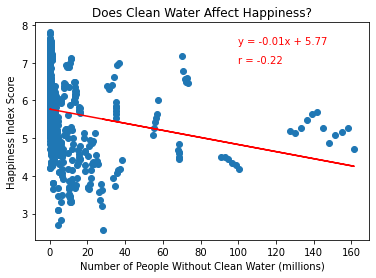

In [63]:
(m, b, r, p, stderr) = linregress(merged_df["num ppl wo clean h20"], merged_df["Score"])
y_regress = m * merged_df["num ppl wo clean h20"] + b

# Make scatter diagram
plt.scatter(merged_df["num ppl wo clean h20"], merged_df["Score"])
plt.xlabel("Number of People Without Clean Water (millions)")
plt.ylabel("Happiness Index Score")
plt.title("Does Clean Water Affect Happiness?")

# Plot line of regression
plt.plot(merged_df["num ppl wo clean h20"], y_regress, color="red")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(100, 7.5))
plt.annotate(f"r = {r:.2f}", color="red", xy=(100, 7.0))

# Display plot
plt.show()